# BP3D Dataset EDA
## DSE-260 Group2
Reference: https://github.com/OAAS-BEAR/WildFire-Project
### Imports

In [1]:
import bp3d
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
c = bp3d.Client(url='https://burnpro3d.sdsc.edu/api')
ens = c.load_ensemble('uniform-pgml-success.bp3d.json')
out = ens.output()

# get size of the data
# sum([(out[x].zarr.store.getsize()) for x in range(1, len(out))])

replacing ignite.dat with 634fbd7a-9336-4d31-a40e-39d2f12856a4
replacing ignite.dat with 37ed00f4-9578-493e-8b80-a5360daec896
replacing ignite.dat with dd0683cb-ca0e-4b03-ad93-8cffec6a8852
replacing ignite.dat with 63c02542-0e20-4de4-8e7d-ee0b8f32f100
replacing ignite.dat with 71dc1f46-19cd-4489-beef-453ea485c675
Save ensemble to replace ignition file contents with new ids.


### Explore Data

In [3]:
# lets look at ensemble # 3 [2]:
out[2].zarr.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='fire-energy_to_atmos …

#### We can see that the ensemble contains 8 arrays of different data:
- Fire Energy to Atmosphere
- Fuel Density
- Fuel Moisture
- Surf Energy
- Topography
- 3 directions of the Wind Speed

### Explore the Topography feature

In [5]:
topography = out[1].zarr['topography']

In [6]:
print('Shape:', topography.shape)

Shape: (300, 300)


In [7]:
topography = np.array(topography)

In [8]:
topography

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [9]:
topography.std()

0.0

In [10]:
topography.mean()

0.0

### Explore the Wind feature (one of the dimensions - wind_u)

In [12]:
windu = np.array(out[1].zarr['windu'])

In [13]:
windu

array([[[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         ...,
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]]],


       [[[0.436 , 0.436 , 0.436 , ..., 0.436 , 0.436 , 0.436 ],
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         ...,
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         [0.436 , 0.436 , 0.436 , ..., 0.436 , 0.436 , 0.436 ]]],


       [[[0.436 , 0.436 , 0.436 , ..., 0.4382, 0.436 , 0.4333],
         [0.3867, 0.3374, 0.3374, ..., 0.3484, 0.3865, 0.424 ],
         [0.3867, 0.3374, 0.3374, ..., 0.35  , 0.3865, 0.422 ],
    

In [14]:
windu.mean()

0.344

In [15]:
windu[1,:,:,:].std()

0.01056

In [16]:
windu.max()

37.25

In [17]:
windu.min()

-59.94

Text(0, 0.5, 'mean wind speed m/s')

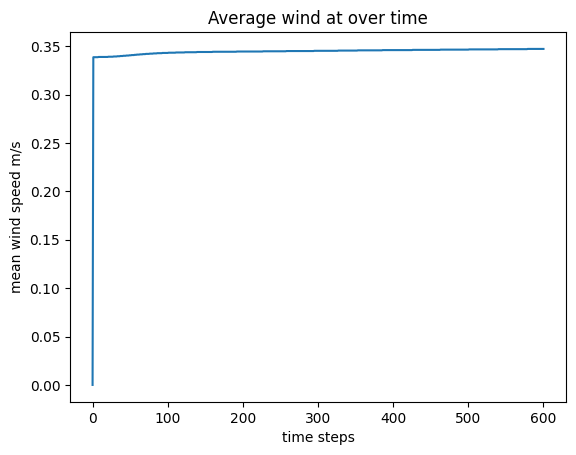

In [18]:
windu_mean_over_time = [ windu[x,0,:,:].mean() for x in range(601)]
time = [x for x in range(601)]
plt.plot(time, windu_mean_over_time)
plt.title('Average wind at over time')
plt.xlabel('time steps')
plt.ylabel('mean wind speed m/s')
# windu_mean_over_time

### Explore the Fuel Moisture feature

In [20]:
fuels_moist = np.array(out[1].zarr['fuels-moist'])

In [21]:
fuels_moist.shape

(601, 1, 300, 300)

In [22]:
fuels_moist

array([[[[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         ...,
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         ...,
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         ...,
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.05, 0.05, ..., 0.05, 0.05, 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]],


       ...

Text(0, 0.5, 'Fuels Moist')

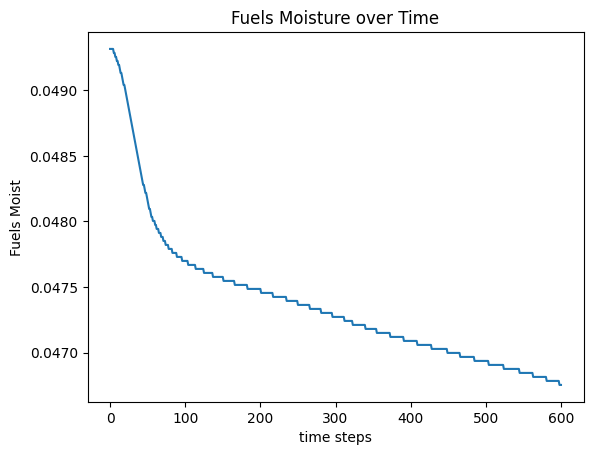

In [23]:
fuels_moist_over_time = [ fuels_moist[x,0,:,:].mean() for x in range(601)]
time = [x for x in range(601)]
plt.plot(time, fuels_moist_over_time)
plt.title('Fuels Moisture over Time')
plt.xlabel('time steps')
plt.ylabel('Fuels Moist')

### Explore the Fire Energy to Atmosphere

In [24]:
energy_to_atmos = np.array(out[1].zarr['fire-energy_to_atmos'])

In [25]:
energy_to_atmos.shape

(601, 1, 300, 300)

In [26]:
energy_to_atmos

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [27]:
energy_to_atmos.mean()

0.817

In [28]:
energy_to_atmos.std()

C:\Users\d64105\Desktop\personal\UCSD\DSE260\venv_bp3d\lib\site-packages\numpy\core\_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


inf

Text(0, 0.5, 'Fire Energy')

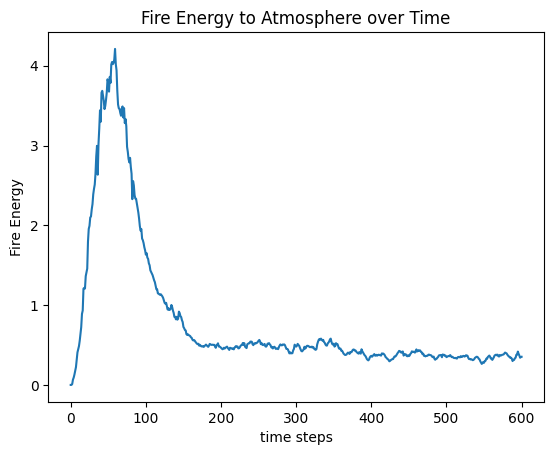

In [36]:
energy_to_atmos_over_time = [ energy_to_atmos[x,0,:,:].mean() for x in range(601)]
time = [x for x in range(601)]
plt.plot(time, energy_to_atmos_over_time)
plt.title('Fire Energy to Atmosphere over Time')
plt.xlabel('time steps')
plt.ylabel('Fire Energy')

### Explore the Surf Energy Feature

In [30]:
surf_energy = np.array(out[1].zarr['surfEnergy'])

In [31]:
surf_energy.shape

(600, 1, 300, 300)

In [32]:
surf_energy

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [33]:
surf_energy.mean()

1.042

In [34]:
surf_energy.std()

inf

Text(0, 0.5, 'Surf Energy')

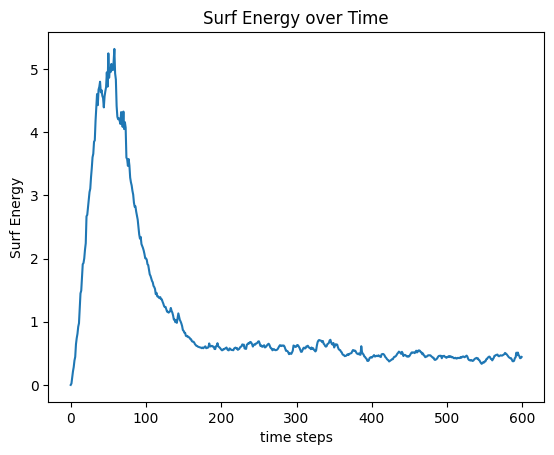

In [35]:
surf_energy_over_time = [ surf_energy[x,0,:,:].mean() for x in range(600)]
time = [x for x in range(600)]
plt.plot(time, surf_energy_over_time)
plt.title('Surf Energy over Time')
plt.xlabel('time steps')
plt.ylabel('Surf Energy')

### Explore the Fuel Density Feature

In [37]:
fuels_dens = np.array(out[1].zarr['fuels-dens'])

In [38]:
fuels_dens.shape

(601, 1, 300, 300)

In [39]:
fuels_dens

array([[[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         ...,
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]]],


       [[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         ...,
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]]],


       [[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         ...,
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]]],


       ...,


       [[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
         [0.

In [40]:
fuels_dens.mean()

0.6665

In [41]:
fuels_dens.std()

inf

Text(0, 0.5, 'Fuel Density kg/m^3')

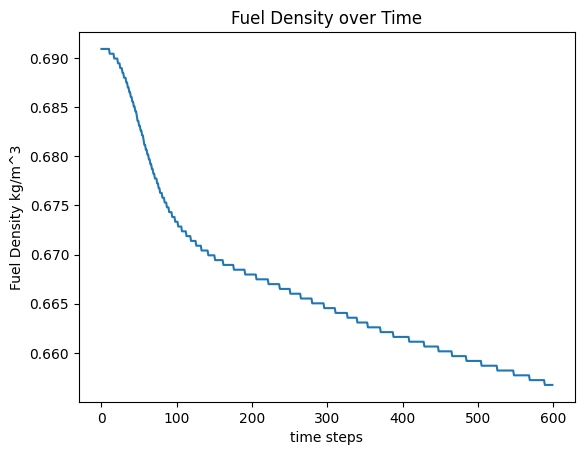

In [43]:
fuels_dens_over_time = [ fuels_dens[x,0,:,:].mean() for x in range(600)]
time = [x for x in range(600)]
plt.plot(time, fuels_dens_over_time)
plt.title('Fuel Density over Time')
plt.xlabel('time steps')
plt.ylabel('Fuel Density kg/m^3')